In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [6]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pystan (from versions: none)
ERROR: No matching distribution found for pystan


In [7]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [8]:
from prophet import Prophet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
df=pd.read_csv('crude-oil-price.csv',parse_dates=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           504 non-null    object 
 1   price          504 non-null    float64
 2   percentChange  503 non-null    float64
 3   change         503 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.9+ KB


In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           504 non-null    datetime64[ns, UTC]
 1   price          504 non-null    float64            
 2   percentChange  503 non-null    float64            
 3   change         503 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 15.9 KB


In [13]:
df=df.rename(columns={'date':'ds','price':'y'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   ds             504 non-null    datetime64[ns, UTC]
 1   y              504 non-null    float64            
 2   percentChange  503 non-null    float64            
 3   change         503 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 15.9 KB


In [15]:
df=df.drop(['percentChange','change'],axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      504 non-null    datetime64[ns, UTC]
 1   y       504 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 8.0 KB


In [17]:
df.head()

,ds,y
0,1983-03-01 00:00:00+00:00,29.27
1,1983-04-01 00:00:00+00:00,30.63
2,1983-05-01 00:00:00+00:00,30.25
3,1983-06-01 00:00:00+00:00,31.38
4,1983-07-01 00:00:00+00:00,32.00


In [18]:
df['ds']=df['ds'].dt.tz_localize(None)

<Axes: xlabel='ds', ylabel='y'>

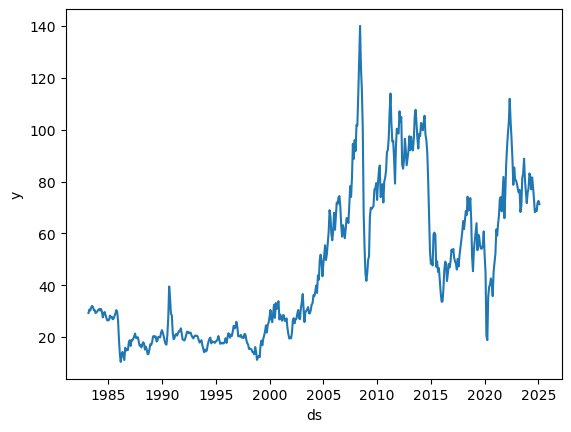

In [19]:
sns.lineplot(data=df,x ='ds',y='y')

In [20]:
df.tail()

,ds,y
499,2024-10-01,69.2600
500,2024-11-01,68.6300
501,2024-12-01,71.7200
502,2025-01-01,72.5300
503,2025-02-01,71.2864


In [21]:

prohet=Prophet()
prohet.fit(df)



19:09:55 - cmdstanpy - INFO - Chain [1] start processing
19:09:55 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
prohet.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [23]:
future=prohet.make_future_dataframe(periods=24,freq='M')
forecast=prohet.predict(future)

In [24]:
future.tail()## now we cans ee  that datas for two more years been added

,ds
523,2026-09-30
524,2026-10-31
525,2026-11-30
526,2026-12-31
527,2027-01-31


In [25]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1983-03-01,22.258460,3.380774,43.572279,22.258460,22.258460,0.179942,0.179942,0.179942,0.179942,0.179942,0.179942,0.0,0.0,0.0,22.438402
1,1983-04-01,22.234282,6.366436,44.865355,22.234282,22.234282,2.571789,2.571789,2.571789,2.571789,2.571789,2.571789,0.0,0.0,0.0,24.806071
2,1983-05-01,22.210884,4.683429,39.945219,22.210884,22.210884,0.763140,0.763140,0.763140,0.763140,0.763140,0.763140,0.0,0.0,0.0,22.974024
3,1983-06-01,22.186706,6.450380,43.278915,22.186706,22.186706,1.642131,1.642131,1.642131,1.642131,1.642131,1.642131,0.0,0.0,0.0,23.828837
4,1983-07-01,22.163308,5.575619,44.275475,22.163308,22.163308,2.247832,2.247832,2.247832,2.247832,2.247832,2.247832,0.0,0.0,0.0,24.411140


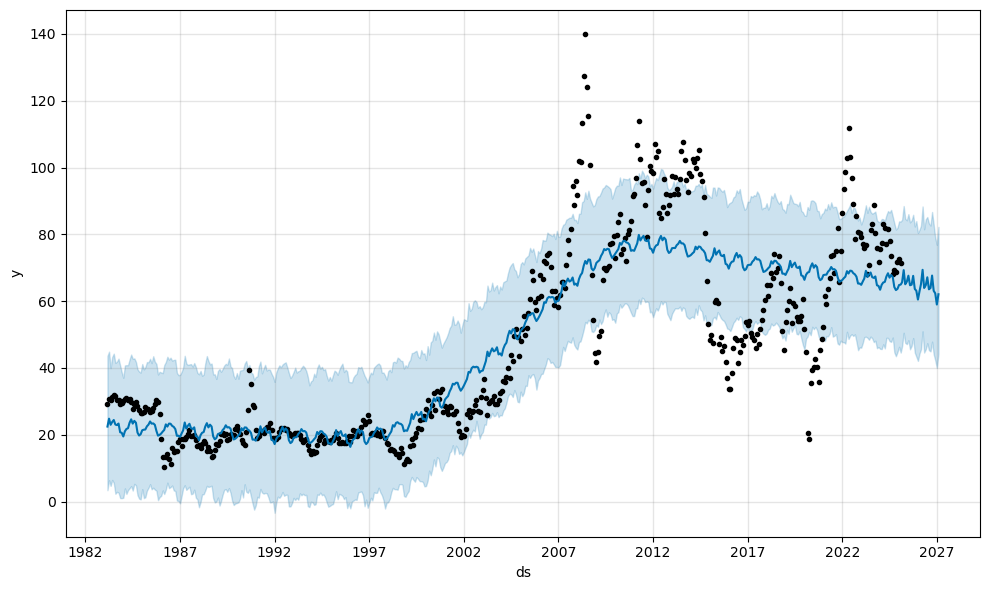

In [26]:
fig1=prohet.plot(forecast)

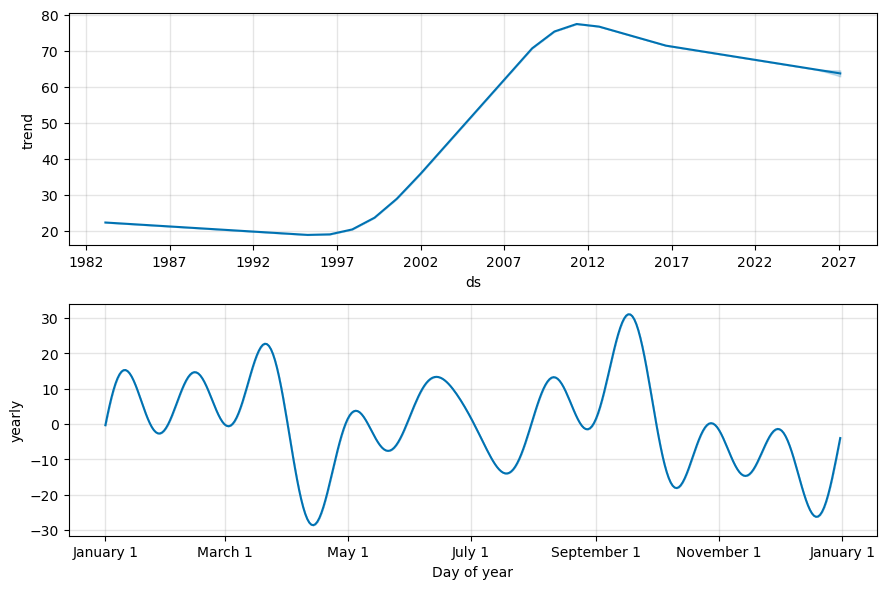

In [27]:
#visualize each components [trends ,yearly]
fig1=prohet.plot_components(forecast)

In [28]:
for i in forecast.columns:
    print(i)

ds
trend
yhat_lower
yhat_upper
trend_lower
trend_upper
additive_terms
additive_terms_lower
additive_terms_upper
yearly
yearly_lower
yearly_upper
multiplicative_terms
multiplicative_terms_lower
multiplicative_terms_upper
yhat


In [29]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(prohet,initial='1460 days',period='365 days',horizon='730 days')
df_cv.head()

  0%|          | 0/36 [00:00<?, ?it/s]

19:09:57 - cmdstanpy - INFO - Chain [1] start processing
19:09:57 - cmdstanpy - INFO - Chain [1] done processing
19:09:57 - cmdstanpy - INFO - Chain [1] start processing
19:09:57 - cmdstanpy - INFO - Chain [1] done processing
19:09:57 - cmdstanpy - INFO - Chain [1] start processing
19:09:58 - cmdstanpy - INFO - Chain [1] done processing
19:09:58 - cmdstanpy - INFO - Chain [1] start processing
19:09:58 - cmdstanpy - INFO - Chain [1] done processing
19:09:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1] done processing
19:09:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1] done processing
19:09:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1] done processing
19:09:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1] done processing
19:09:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1988-03-01,14.507305,10.094820,18.925729,17.08,1988-02-11
1,1988-04-01,13.865203,9.266229,18.295449,17.99,1988-02-11
2,1988-05-01,14.238079,9.596072,18.823870,17.51,1988-02-11
3,1988-06-01,12.532392,7.942408,16.730469,15.16,1988-02-11
4,1988-07-01,10.755927,6.501576,15.480482,16.31,1988-02-11


In [30]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
859,2024-10-01,55.100709,36.542170,74.446518,69.2600,2023-02-02
860,2024-11-01,54.035593,34.276848,72.971720,68.6300,2023-02-02
861,2024-12-01,54.210732,36.822617,72.556148,71.7200,2023-02-02
862,2025-01-01,55.504907,38.044193,74.874282,72.5300,2023-02-02
863,2025-02-01,55.964729,36.895982,74.944520,71.2864,2023-02-02


In [31]:
from prophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,83 days,297.456768,17.246935,10.783503,0.245677,0.173195,0.225196,0.639535
1,84 days,303.266406,17.414546,11.136327,0.246745,0.173195,0.226739,0.616279
2,85 days,337.706113,18.376782,12.165565,0.253798,0.181495,0.233693,0.581395
3,86 days,363.034920,19.053475,12.881571,0.259138,0.183627,0.236084,0.552326
4,87 days,380.000568,19.493603,13.369732,0.266694,0.185848,0.239903,0.552326


In [32]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
202,726 days,664.011386,25.768418,18.808773,0.406019,0.303848,0.396990,0.308140
203,727 days,796.773939,28.227184,20.513900,0.440600,0.307446,0.409214,0.319767
204,728 days,816.486302,28.574224,20.712197,0.443243,0.303848,0.405286,0.337209
205,729 days,878.399078,29.637798,21.667452,0.452085,0.318364,0.423060,0.331395
206,730 days,875.366916,29.586600,21.627465,0.450918,0.318364,0.422985,0.340116


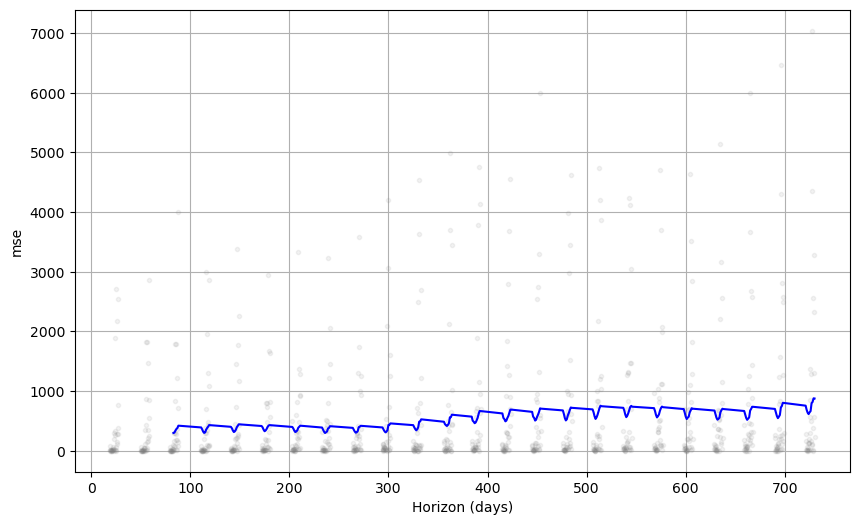

In [33]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')

**Satrting Decsision Tree Regression model training**

In [34]:
for lag in [1,2,3,6,12]:
  df[f"lag_{lag}"]=df['y'].shift(lag)


In [35]:
df

,ds,y,lag_1,lag_2,lag_3,lag_6,lag_12
0,1983-03-01,29.2700,NaN,NaN,NaN,NaN,NaN
1,1983-04-01,30.6300,29.27,NaN,NaN,NaN,NaN
2,1983-05-01,30.2500,30.63,29.27,NaN,NaN,NaN
3,1983-06-01,31.3800,30.25,30.63,29.27,NaN,NaN
4,1983-07-01,32.0000,31.38,30.25,30.63,NaN,NaN
...,...,...,...,...,...,...,...
499,2024-10-01,69.2600,68.17,73.55,77.91,81.93,80.50
500,2024-11-01,68.6300,69.26,68.17,73.55,76.99,76.05
501,2024-12-01,71.7200,68.63,69.26,68.17,81.54,71.65
502,2025-01-01,72.5300,71.72,68.63,69.26,77.91,75.71


In [36]:
df.dropna()

,ds,y,lag_1,lag_2,lag_3,lag_6,lag_12
12,1984-03-01,30.8500,30.55,29.98,29.60,30.36,29.27
13,1984-04-01,30.2600,30.85,30.55,29.98,30.37,30.63
14,1984-05-01,30.8300,30.26,30.85,30.55,29.23,30.25
15,1984-06-01,29.7500,30.83,30.26,30.85,29.60,31.38
16,1984-07-01,27.6000,29.75,30.83,30.26,29.98,32.00
...,...,...,...,...,...,...,...
499,2024-10-01,69.2600,68.17,73.55,77.91,81.93,80.50
500,2024-11-01,68.6300,69.26,68.17,73.55,76.99,76.05
501,2024-12-01,71.7200,68.63,69.26,68.17,81.54,71.65
502,2025-01-01,72.5300,71.72,68.63,69.26,77.91,75.71


In [37]:
X=df.drop(columns=['ds','y'])
y=df['y']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [39]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pred=model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"mean squared error : {mse}")
print(f"score  {r2}")

mean squared error : 51.50708965544554
score  0.9373874953640747


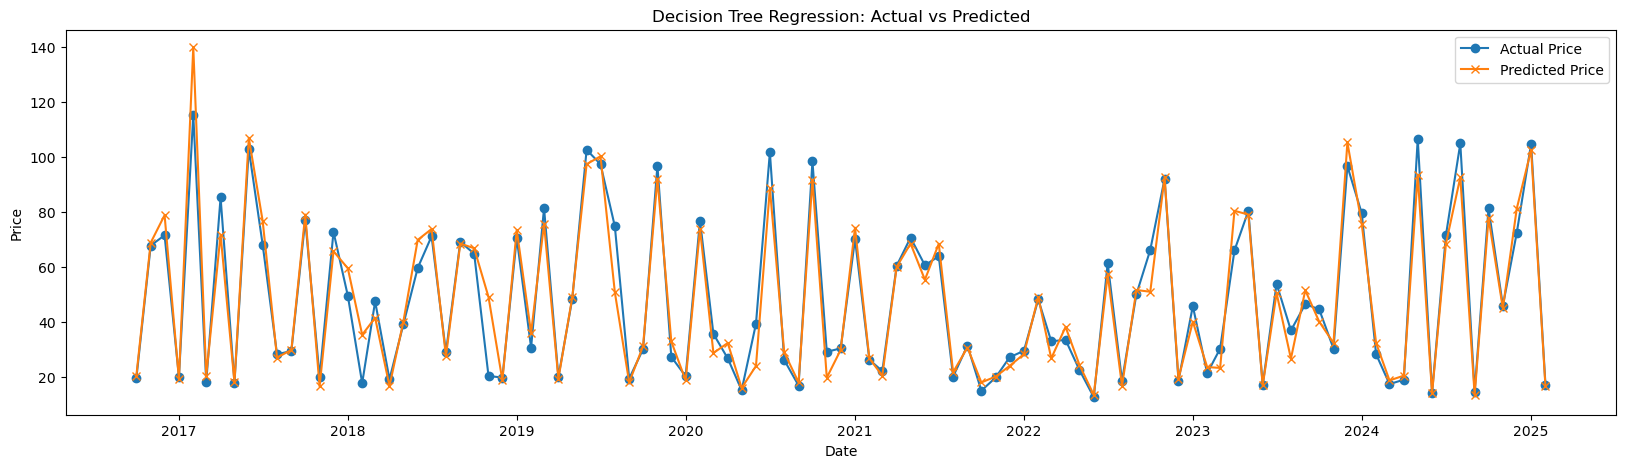

In [42]:
plt.figure(figsize=(20, 5))
plt.plot(df['ds'][-len(y_test):], y_test, label='Actual Price', marker='o')
plt.plot(df['ds'][-len(y_test):], y_pred, label='Predicted Price', marker='x')
plt.legend()
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

[Text(0.6219752025019172, 0.9772727272727273, 'x[0] <= 51.615\nsquared_error = 839.004\nsamples = 403\nvalue = 46.135'),
 Text(0.41208690807131904, 0.9318181818181818, 'x[0] <= 32.26\nsquared_error = 110.24\nsamples = 247\nvalue = 25.945'),
 Text(0.5170310552866181, 0.9545454545454546, 'True  '),
 Text(0.2882650738113497, 0.8863636363636364, 'x[0] <= 24.55\nsquared_error = 29.422\nsamples = 199\nvalue = 21.654'),
 Text(0.16918735621165645, 0.8409090909090909, 'x[0] <= 18.835\nsquared_error = 11.618\nsamples = 140\nvalue = 18.815'),
 Text(0.08914877300613497, 0.7954545454545454, 'x[0] <= 16.455\nsquared_error = 5.343\nsamples = 66\nvalue = 16.283'),
 Text(0.04432515337423313, 0.75, 'x[0] <= 14.595\nsquared_error = 3.313\nsamples = 30\nvalue = 14.447'),
 Text(0.03067484662576687, 0.7045454545454546, 'x[1] <= 15.785\nsquared_error = 3.453\nsamples = 15\nvalue = 13.508'),
 Text(0.025766871165644172, 0.6590909090909091, 'x[4] <= 27.96\nsquared_error = 2.677\nsamples = 13\nvalue = 13.922'),


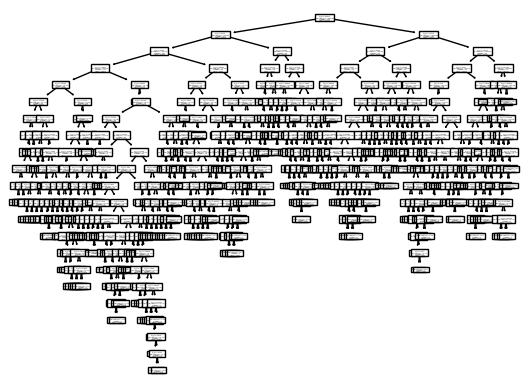

In [43]:
from sklearn import tree

tree.plot_tree(model)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
       'splitter':['best','random'],
       'max_depth':[1,2,3,4,5,9],
       'min_samples_split':[2,3,4,5],
       'min_samples_leaf':[1,2,3,4,5,6]
       

}

In [64]:
random=RandomizedSearchCV(model,param_distributions=param,cv=3,scoring='neg_mean_squared_error')
random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [65]:
random.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_depth': 4,
 'criterion': 'squared_error'}

In [66]:
random.best_score_

-33.47018065512041

In [67]:
random_pred=random.predict(X_test)

In [68]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,random_pred))
print(mean_squared_error(y_test,random_pred))

0.9544191849978516
37.496265938176


In [74]:
hyper_param_model=DecisionTreeRegressor(splitter= 'best',
 min_samples_split=2,
 min_samples_leaf= 6,
 max_depth= 4,
 criterion= 'squared_error'
    
)


In [77]:
hyper_param_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)

[Text(0.5, 0.9, 'x[0] <= 51.615\nsquared_error = 839.004\nsamples = 403\nvalue = 46.135'),
 Text(0.25, 0.7, 'x[0] <= 32.26\nsquared_error = 110.24\nsamples = 247\nvalue = 25.945'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[0] <= 24.55\nsquared_error = 29.422\nsamples = 199\nvalue = 21.654'),
 Text(0.0625, 0.3, 'x[0] <= 18.835\nsquared_error = 11.618\nsamples = 140\nvalue = 18.815'),
 Text(0.03125, 0.1, 'squared_error = 5.343\nsamples = 66\nvalue = 16.283'),
 Text(0.09375, 0.1, 'squared_error = 6.395\nsamples = 74\nvalue = 21.073'),
 Text(0.1875, 0.3, 'x[0] <= 28.835\nsquared_error = 7.175\nsamples = 59\nvalue = 28.39'),
 Text(0.15625, 0.1, 'squared_error = 5.352\nsamples = 32\nvalue = 26.808'),
 Text(0.21875, 0.1, 'squared_error = 2.859\nsamples = 27\nvalue = 30.264'),
 Text(0.375, 0.5, 'x[0] <= 41.885\nsquared_error = 52.51\nsamples = 48\nvalue = 43.734'),
 Text(0.3125, 0.3, 'x[3] <= 32.775\nsquared_error = 24.997\nsamples = 19\nvalue = 36.864'),
 Text(0.28125, 0.1, 'squared_e

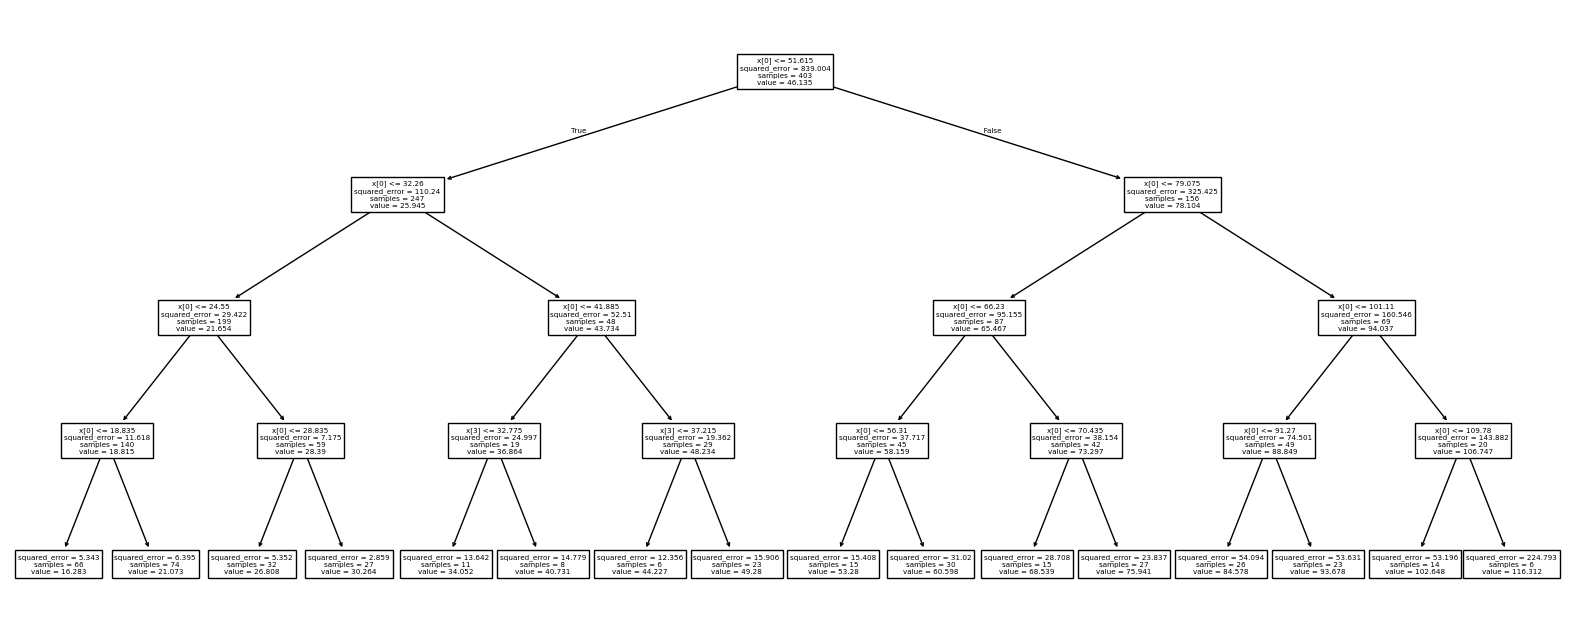

In [79]:
plt.figure(figsize=(20,8))
tree.plot_tree(hyper_param_model)

**Predcting new data**

In [44]:
model.predict([[30,32,34,45,32]])

array([27.6])

In [45]:
forecast=prohet.make_future_dataframe(periods=24,freq='M')
forecast=prohet.predict(forecast)

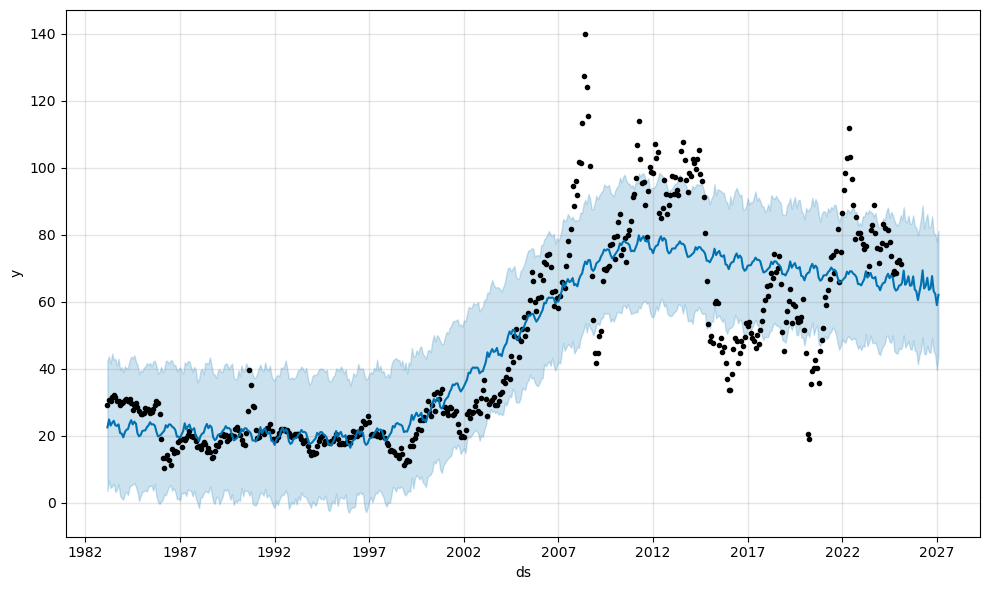

In [46]:
fig1=prohet.plot(forecast)